Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def exercise_0(file):
    transaction = pd.read_csv(file)
    return transaction

def exercise_1(df):
    column_names = df.columns.tolist()
    return column_names


def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(k)

def exercise_4(df):
    unicorn = df['type'].unique().tolist()
    return unicorn

def exercise_5(df):
    top_destinations = df['nameDest'].value_counts().head(10)
    return top_destinations

def exercise_6(df):
    fraudulent_rows = df[df['isFraud'] == 1]
    return fraudulent_rows

def exercise_7(df):
    distinct_destinations = df.groupby('nameOrig')['nameDest'].nunique().reset_index()
    distinct_destinations_sorted = distinct_destinations.sort_values(by='nameDest', ascending=False)

    return distinct_destinations_sorted
    
def visual_1(df):
    # Transaction types bar chart
    transaction_type_counts = df['type'].value_counts()
    plt.figure(figsize=(8, 6))
    transaction_type_counts.plot(kind='bar')
    plt.title('Transaction Types')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Transaction types split by fraud bar chart
    transaction_types_fraud = df.groupby(['type', 'isFraud']).size().unstack()
    transaction_types_fraud.plot(kind='bar', stacked=True)
    plt.title('Transaction Types Split by Fraud')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return "The transaction types bar chart provides an overview of the distribution of different types of transactions. The transaction types split by fraud bar chart shows how fraud is distributed across different transaction types."

def visual_2(df):
    cash_out_transactions = df[df['type'] == 'CASH_OUT']
    plt.figure(figsize=(8, 6))
    plt.scatter(cash_out_transactions['oldbalanceOrg'] - cash_out_transactions['newbalanceOrig'], cash_out_transactions['oldbalanceDest'] - cash_out_transactions['newbalanceDest'])
    plt.title('Origin Account Balance Delta vs. Destination Account Balance Delta (Cash Out Transactions)')
    plt.xlabel('Origin Account Balance Delta')
    plt.ylabel('Destination Account Balance Delta')
    plt.tight_layout()
    plt.show()

    return "The scatter plot of Origin Account Balance Delta vs Destination Account Balance Delta for Cash Out transactions helps visualize the relationship between these variables in Cash Out transactions."

def exercise_custom(df):
    return df.style.pipe(make_pretty)
    
def visual_custom(df):
    # Extract column names
    column_names = df.columns.tolist()

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(column_names))

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Column Names Word Cloud')
    plt.show()


    # Create a pie chart of transaction type percentages
    transaction_type_counts = df['type'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Transaction Type Distribution')
    plt.show()

    return "The visualizations provide insights into the transaction dataset."

In [3]:
# Read the dataset (transactions.csv) as a Pandas dataframe

df = exercise_0("transactions.csv")

In [4]:
# Show column names as a list from the dataframe df

exercise_1(df)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [5]:
# first k rows from the dataframe
exercise_2(df,5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# Show random k rows from the dataframe
exercise_3(df,5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
18652,8,CASH_OUT,354556.39,C1111564269,0.00,0.00,C1888439681,853390.91,3476255.29,0,0
198346,13,PAYMENT,14158.89,C276530285,0.00,0.00,M1483758614,0.00,0.00,0,0
160547,12,CASH_IN,37631.89,C174817462,4843113.34,4880745.23,C805150825,59062.18,252496.50,0,0
199867,13,PAYMENT,16111.27,C880748305,400656.45,384545.17,M838276513,0.00,0.00,0,0
15412,8,CASH_IN,141854.93,C1472911013,102656.00,244510.93,C1660095722,10267.00,3806682.25,0,0


In [7]:
# Show list of the unique transaction types.

exercise_4(df)

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

In [8]:
# Show series of the top 10 transaction destinations with frequencies.
exercise_5(df)

nameDest
C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64
Name: count, dtype: int64

In [9]:
# Show rows from the dataframe for which fraud was detected.
exercise_6(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
182862,13,CASH_OUT,408.00,C1894004688,408.00,0.0,C1293978242,898297.85,1075854.14,1,0
193765,13,TRANSFER,48375.02,C920803432,48375.02,0.0,C1767389067,0.00,0.00,1,0
193766,13,CASH_OUT,48375.02,C1894578299,48375.02,0.0,C590035788,374803.26,658520.33,1,0
196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.0,C1548348754,0.00,0.00,1,0


In [10]:
# Show number of distinct destinations that each source has interacted with to, sorted in descending order.

exercise_7(df)

,nameOrig,nameDest
173368,C745009740,2
122825,C260230637,2
142013,C44568807,2
73007,C1709295811,2
133325,C361604284,1
...,...,...
66667,C1648185402,1
66668,C1648194899,1
66669,C1648216508,1
66670,C1648222711,1


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

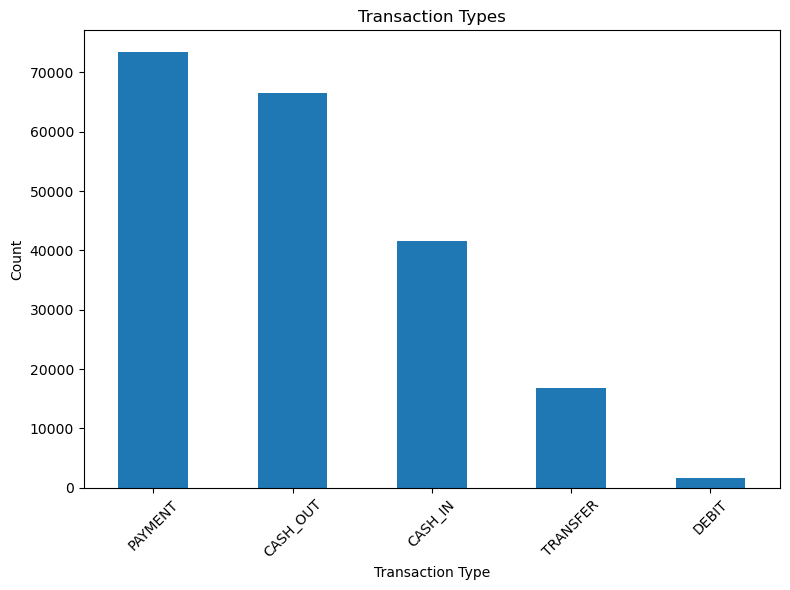

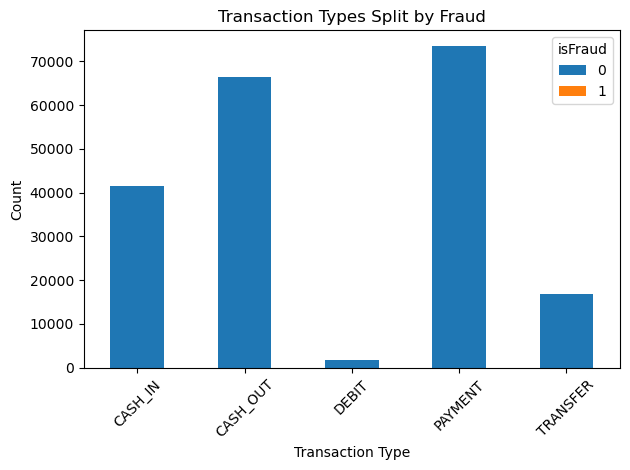

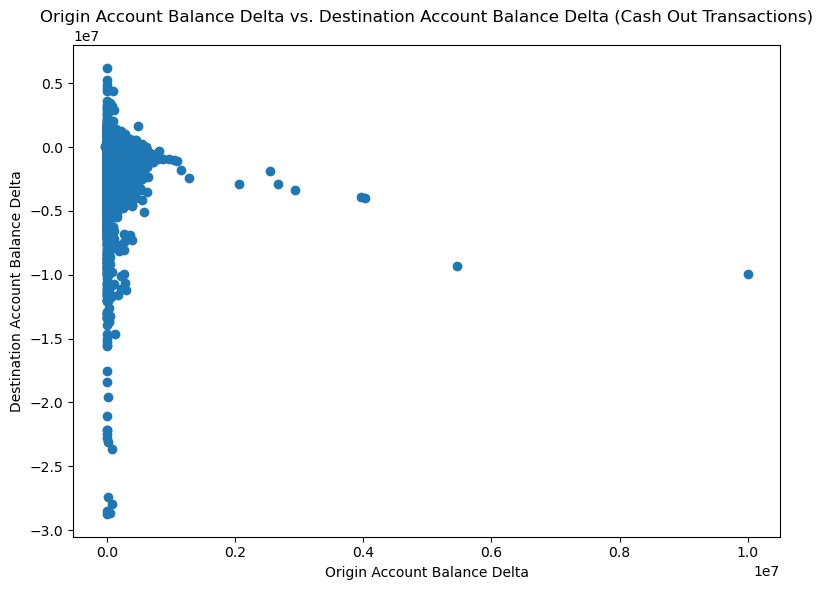

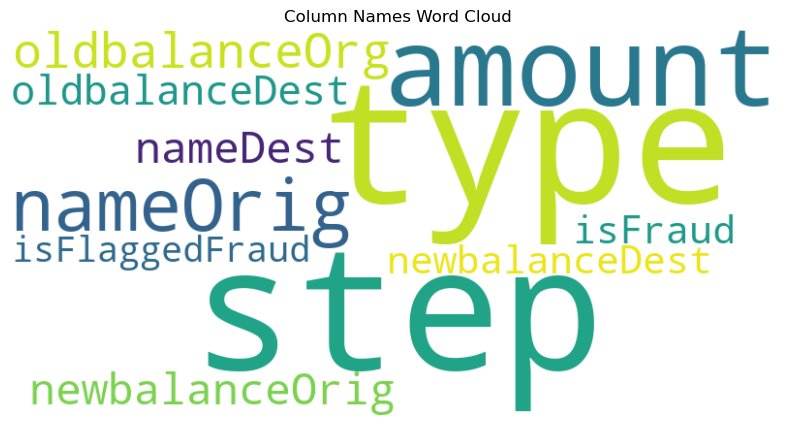

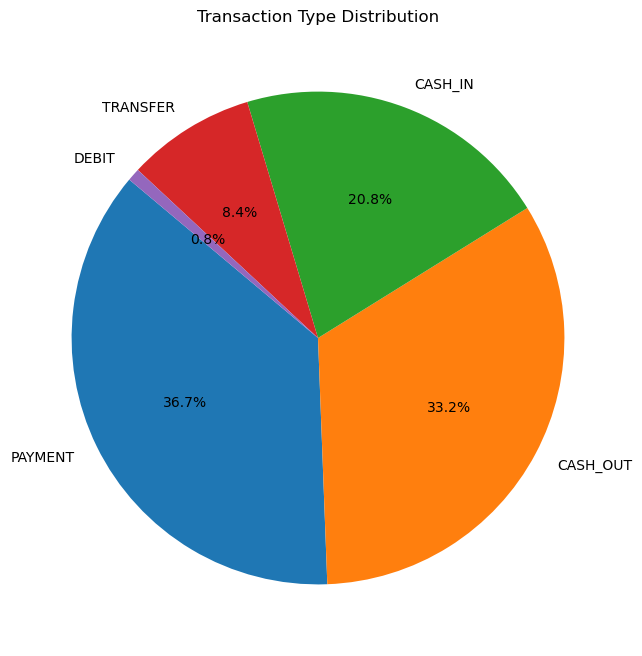

'The visualizations provide insights into the transaction dataset.'

In [13]:
# Call the visual functions
visual_1(df)
visual_2(df)
visual_custom(df)